Logistic Regression with Metropolis-Hastings -- skeleton notebook for lab
==

In [1]:
import numpy as np
import pylab as plt
%matplotlib inline

Generate some data

In [2]:
x = np.random.randn(50,2)
x[:25,:] += 1.5
x[25:,:] += -1.5
t = np.zeros((50,1))
t[25:] += 1

Plot the data

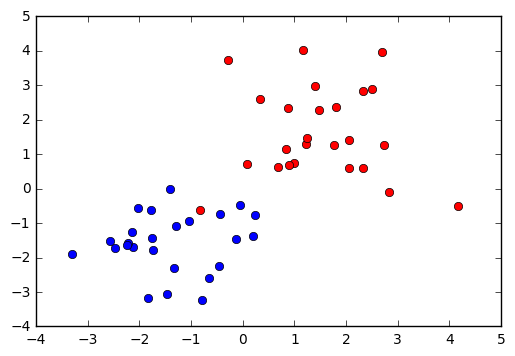

In [3]:
plt.figure()
styles = ['ro','bo']
classes = np.unique(t)
for i,classn in enumerate(classes):
    pos = np.where(t==classn)[0]
    plt.plot(x[pos,0],x[pos,1],styles[i])

In [17]:
def compute_log_prior(w,sig_sq):
    lp = -(1.0/(2.0*sig_sq))*np.dot(w.T,w)
    return lp.flatten()

In [18]:
def compute_log_like(w,x,t):
    pos0 = np.where(t==0)[0]
    pos1 = np.where(t==1)[0]
    P = 1.0/(1.0 + np.exp(-np.dot(x,w)))
    return np.log(P[pos1]).sum() + np.log(1-P[pos0]).sum()

In [19]:
jump_sig = 0.1
sig_sq = 0.5
w = np.vstack((0.0,0.0))
n_samples = 1000

# Add metropolis here.

Samples should be stored in `w_samples` which should have one row per sample (and two columns)

Do some plotting. First twenty random samples

(-5, 5)

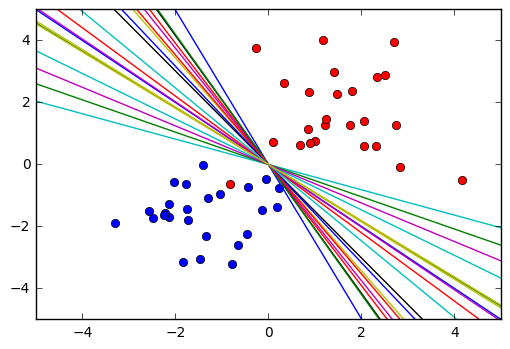

In [23]:
plt.figure()
for i,classn in enumerate(classes):
    pos = np.where(t==classn)[0]
    plt.plot(x[pos,0],x[pos,1],styles[i])

# Pick 20 random ones
for w_sample in np.random.permutation(w_samples)[:20]:
#     Plot the line corresponding to w.Tx = 0
    xv = np.array([-5,5])
    yv = (-w_sample[1]/w_sample[0])*xv
    plt.plot(xv,yv)
plt.xlim([-5,5])
plt.ylim([-5,5])
    

Plot the decision boundary. We will actually plot probability contours by making a big grid. To get these values, we have to take an expectation over the approximate posterior (the Laplacian) which we in turn approximate by sampling

In [24]:
gridX,gridY = np.meshgrid(np.arange(-5,5,0.1),np.arange(-5,5,0.1))

Following performs the predictive expectation over the samples. I.e. predicts at every point in the grid for every sample and then averages over samples.

In [25]:
nr,nc = gridX.shape
gx = np.reshape(gridX,(nr*nc,1))
gy = np.reshape(gridY,(nr*nc,1))
g = np.hstack((gx,gy))
P = (1.0/(1+np.exp(np.dot(g,w_samples.T)))).mean(axis=1)
P = np.reshape(P,(nr,nc))

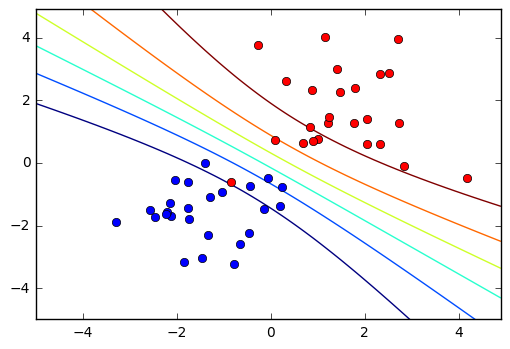

In [26]:
plt.figure()
for i,classn in enumerate(classes):
    pos = np.where(t==classn)[0]
    plt.plot(x[pos,0],x[pos,1],styles[i])
plt.contour(gridX,gridY,P)